# Análise de Dados do Gapminder

## Sobre o Projeto
Este notebook contém uma análise completa dos dados do Gapminder, que inclui informações socioeconômicas de diversos países ao longo dos anos. O objetivo é explorar e visualizar os dados para extrair insights valiosos sobre o desenvolvimento global.

## Estrutura do Projeto
1. **Configuração Inicial**
   - Importação de bibliotecas
   - Carregamento dos dados
   
2. **Análise Exploratória**
   - Primeiras visualizações
   - Estatísticas descritivas
   
3. **Análise por Continente**
   - Comparações entre continentes
   - Evolução temporal
   
4. **Análise de Relacionamentos**
   - Correlações entre variáveis
   - Visualizações avançadas
   
5. **Dashboard Interativo**
   - Criação de painel interativo
   
6. **Conclusões**
   - Principais descobertas
   - Insights finais

## 1. Configuração Inicial

Nesta seção, vamos importar as bibliotecas necessárias e carregar os dados do arquivo CSV.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Configuração do estilo dos gráficos
# Usando um estilo disponível no seu matplotlib
plt.style.use('ggplot')  # Alternativa ao 'seaborn' que está disponível
sns.set_theme(style="whitegrid")  # Configuração moderna do seaborn
sns.set_palette("husl")
%matplotlib inline

# Carregando os dados
try:
    # Tenta carregar o arquivo CSV com o caminho correto
    df = pd.read_csv('trabalhoAv1_Ciencias_Dados/Notebooks/data/gapminder_full.csv')
    print("Dados carregados com sucesso!")
    print(f"\nVisualização das primeiras linhas:")
    display(df.head())
    
    print("\nInformações sobre o dataset:")
    df.info()
    
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")
    print("Verifique se o arquivo 'gapminder_full.csv' está no diretório correto.")

Dados carregados com sucesso!

Visualização das primeiras linhas:


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106



Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1736 non-null   object 
 1   year       1736 non-null   int64  
 2   pop        1736 non-null   float64
 3   continent  1736 non-null   object 
 4   lifeExp    1736 non-null   float64
 5   gdpPercap  1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


## 2. Análise Exploratória

Nesta seção, vamos explorar os dados para entender sua estrutura, distribuição e identificar possíveis valores ausentes ou outliers.

Valores ausentes por coluna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Estatísticas descritivas:


,year,pop,lifeExp,gdpPercap
count,1736.000000,1.736000e+03,1736.000000,1736.000000
mean,1979.669931,3.156800e+07,59.511979,7240.155986
std,17.296364,1.172888e+08,12.956028,9839.873695
min,1952.000000,6.001100e+04,23.599000,241.165876
25%,1967.000000,2.818694e+06,48.245000,1202.060309
50%,1982.000000,7.150606e+06,60.808000,3534.772106
75%,1997.000000,1.977102e+07,70.945000,9380.254270
max,2007.000000,1.318683e+09,82.603000,113523.132900



Distribuição de países por continente:


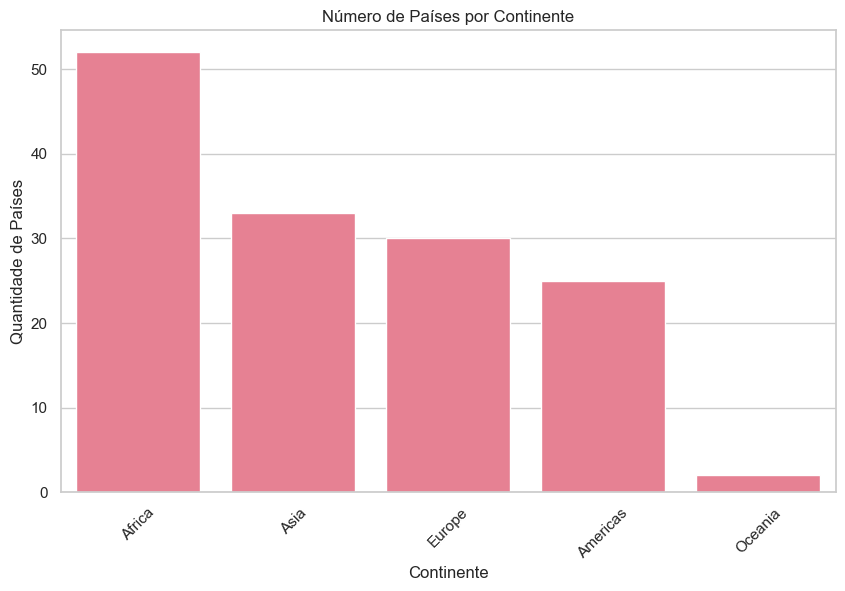

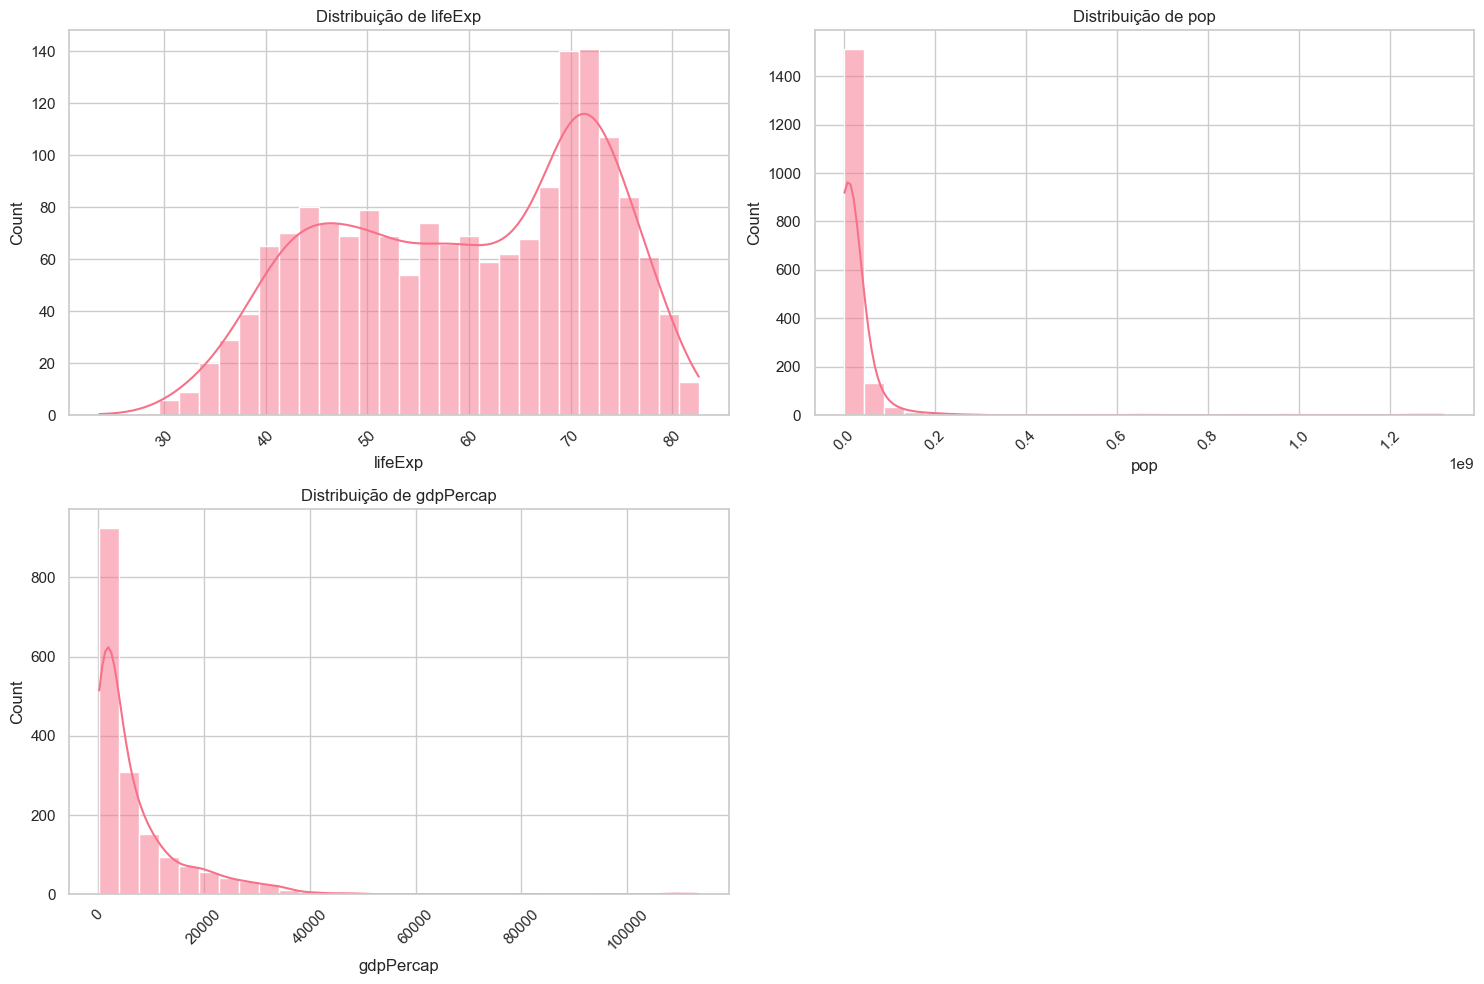

In [2]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Estatísticas descritivas básicas
print("\nEstatísticas descritivas:")
display(df.describe())

# Contagem de países por continente
print("\nDistribuição de países por continente:")
contagem_continentes = df[['country', 'continent']].drop_duplicates()['continent'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_continentes.index, y=contagem_continentes.values)
plt.title('Número de Países por Continente')
plt.xlabel('Continente')
plt.ylabel('Quantidade de Países')
plt.xticks(rotation=45)
plt.show()

# Distribuição das variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(['lifeExp', 'pop', 'gdpPercap']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Análise por Continente

Nesta seção, vamos comparar as métricas entre os diferentes continentes e analisar sua evolução ao longo do tempo.

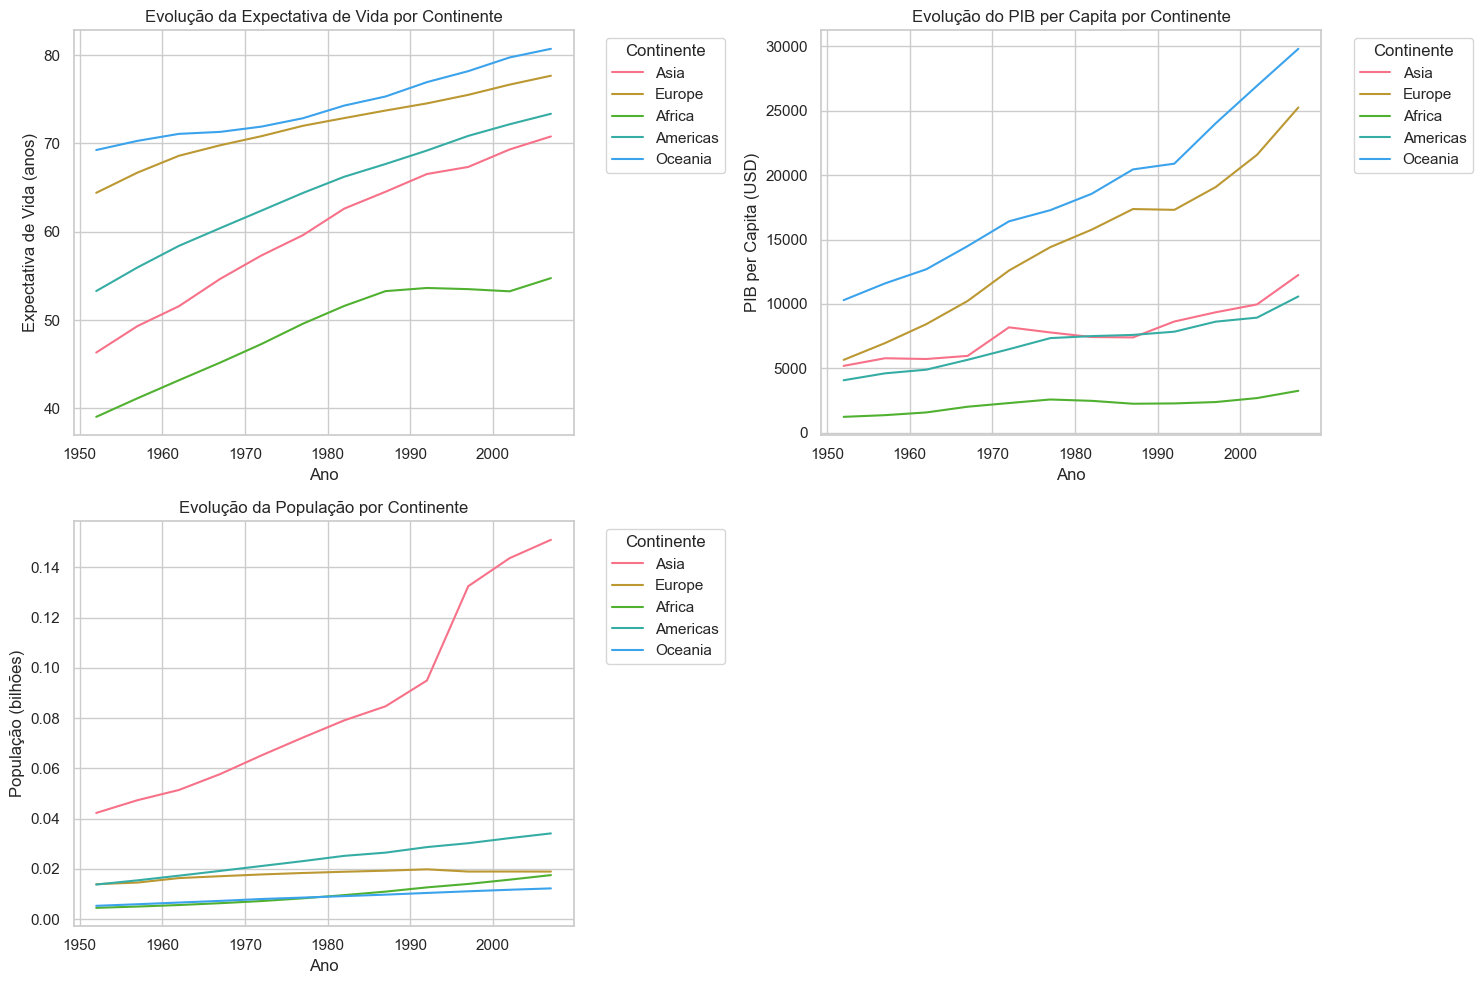

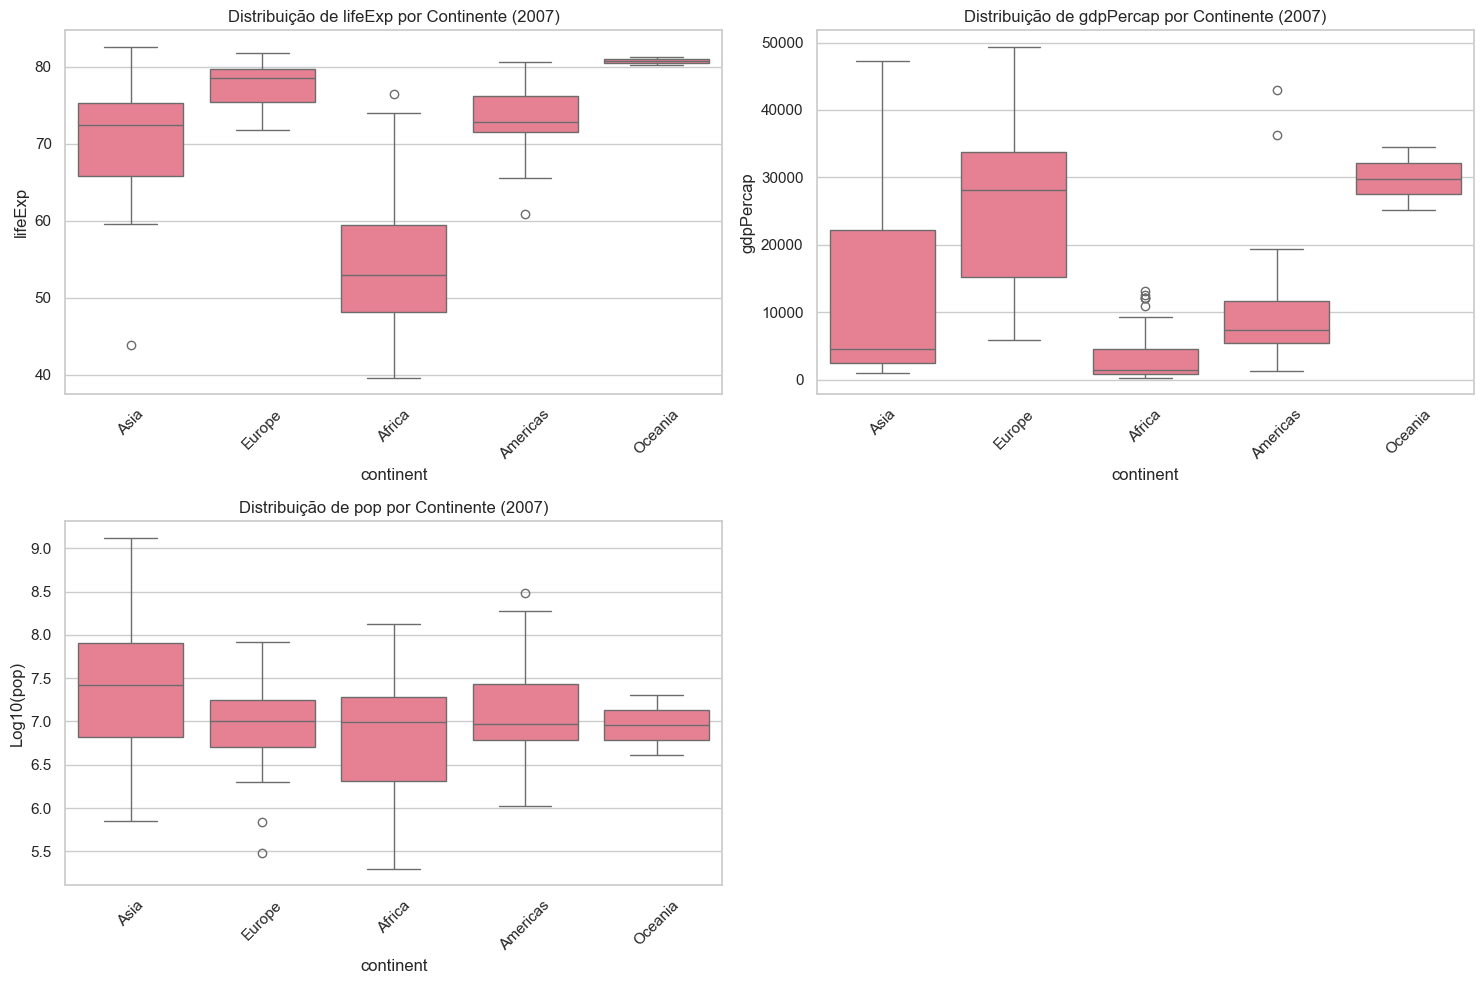

In [3]:
# Médias por continente ao longo dos anos
plt.figure(figsize=(15, 10))

# Expectativa de vida por continente
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='year', y='lifeExp', hue='continent', errorbar=None)
plt.title('Evolução da Expectativa de Vida por Continente')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (anos)')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

# PIB per capita por continente
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='year', y='gdpPercap', hue='continent', errorbar=None)
plt.title('Evolução do PIB per Capita por Continente')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita (USD)')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

# População por continente (em bilhões)
plt.subplot(2, 2, 3)
df_pop = df.copy()
df_pop['pop_billions'] = df_pop['pop'] / 1e9  # Convertendo para bilhões
sns.lineplot(data=df_pop, x='year', y='pop_billions', hue='continent', errorbar=None)
plt.title('Evolução da População por Continente')
plt.xlabel('Ano')
plt.ylabel('População (bilhões)')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Boxplot das variáveis por continente (último ano disponível)
ultimo_ano = df['year'].max()
df_ultimo_ano = df[df['year'] == ultimo_ano]

plt.figure(figsize=(15, 10))
for i, col in enumerate(['lifeExp', 'gdpPercap', 'pop']):
    plt.subplot(2, 2, i+1)
    if col == 'pop':
        sns.boxplot(data=df_ultimo_ano, x='continent', y=np.log10(df_ultimo_ano[col]))
        plt.ylabel(f'Log10({col})')
    else:
        sns.boxplot(data=df_ultimo_ano, x='continent', y=col)
    plt.title(f'Distribuição de {col} por Continente ({ultimo_ano})')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

## 4. Análise de Relacionamentos

Nesta seção, vamos explorar as relações entre as diferentes variáveis do conjunto de dados, com foco especial na relação entre PIB per capita e expectativa de vida.

interactive(children=(IntSlider(value=2007, continuous_update=False, description='Ano:', max=2007, min=1952, s…

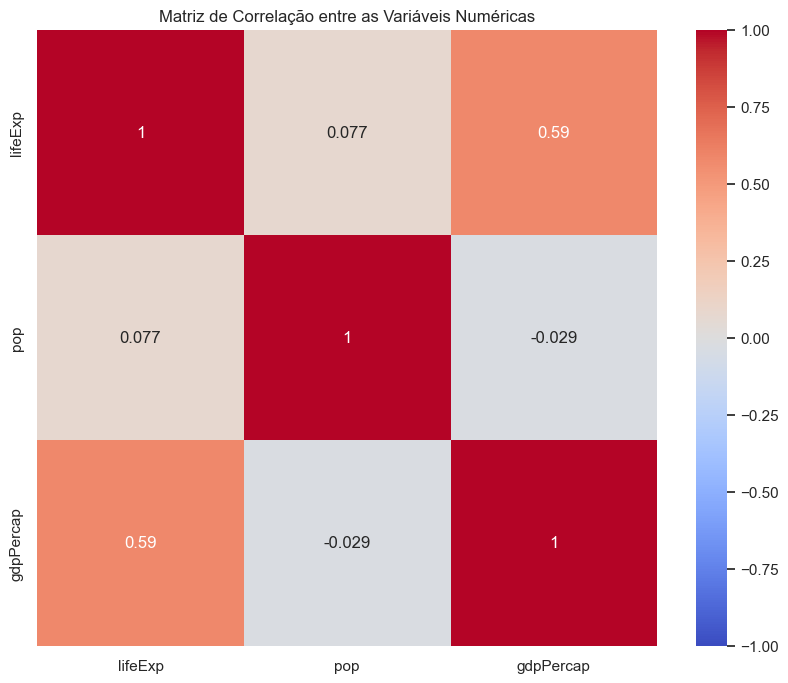

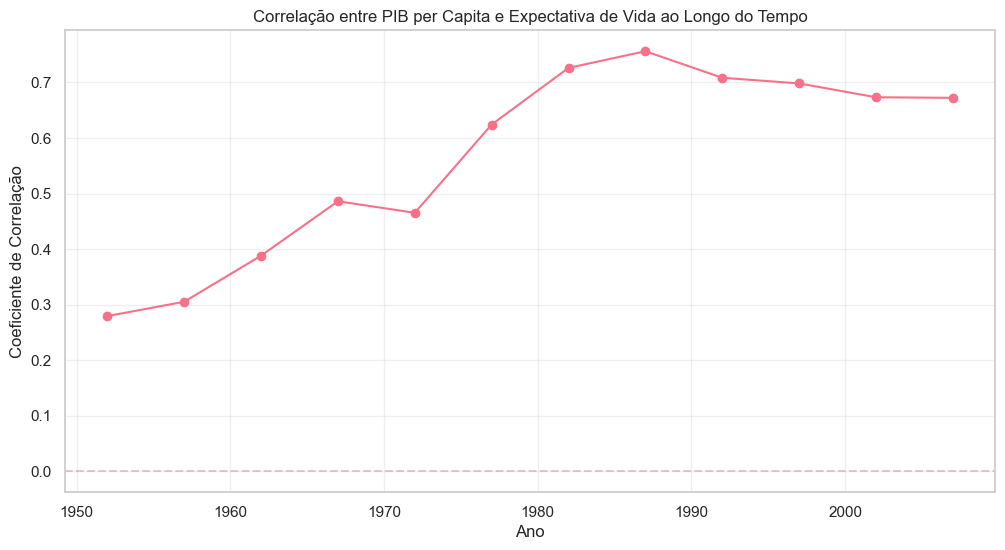

In [4]:
# Função para criar gráfico de dispersão interativo
@interact(ano=widgets.IntSlider(min=df['year'].min(), 
                              max=df['year'].max(), 
                              step=5, 
                              value=df['year'].max(),
                              description='Ano:',
                              continuous_update=False))
def plot_scatter(ano):
    df_ano = df[df['year'] == ano].copy()
    df_ano['pop_millions'] = df_ano['pop'] / 1e6  # Convertendo para milhões
    
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(data=df_ano, 
                            x='gdpPercap', 
                            y='lifeExp',
                            size='pop_millions',
                            sizes=(30, 500),
                            hue='continent',
                            alpha=0.7)
    
    plt.xscale('log')
    plt.xlabel('PIB per Capita (USD - Escala Logarítmica)')
    plt.ylabel('Expectativa de Vida (anos)')
    plt.title(f'Relação entre PIB per Capita e Expectativa de Vida ({ano})')
    
    # Ajustando a legenda
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles[1:7], 
               labels=labels[1:7],
               title='Continente',
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')
    
    # Adicionando legenda de tamanho separada
    pop_legend = plt.legend(handles=handles[7:], 
                           labels=labels[7:],
                           title='População (milhões)',
                           bbox_to_anchor=(1.05, 0.7), 
                           loc='upper left')
    plt.gca().add_artist(pop_legend)
    
    plt.tight_layout()
    plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
corr = df[['lifeExp', 'pop', 'gdpPercap']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre as Variáveis Numéricas')
plt.show()

# Análise de correlação ao longo do tempo
# Corrigindo a análise de correlação
corr_over_time = []
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    corr = df_year[['lifeExp', 'gdpPercap']].corr().iloc[0, 1]
    corr_over_time.append({'year': year, 'correlation': corr})

corr_over_time = pd.DataFrame(corr_over_time)

plt.figure(figsize=(12, 6))
plt.plot(corr_over_time['year'], corr_over_time['correlation'], marker='o')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Correlação entre PIB per Capita e Expectativa de Vida ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Coeficiente de Correlação')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Dashboard Interativo

Nesta seção, criaremos um painel interativo que permite explorar os dados de forma dinâmica, filtrando por ano, continente e métricas específicas.

In [5]:
# Importações adicionais necessárias para o dashboard
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML

# Criando uma cópia dos dados para o dashboard
df_dash = df.copy()

# Obtendo listas únicas para os filtros
anos = sorted(df_dash['year'].unique())
paises = sorted(df_dash['country'].unique())
continentes = sorted(df_dash['continent'].unique())

# Criando os widgets de controle
ano_selecionado = widgets.Dropdown(
    options=anos,
    value=max(anos),
    description='Ano:',
    disabled=False,
)

continentes_selecionados = widgets.SelectMultiple(
    options=continentes,
    value=continentes,
    description='Continentes:',
    disabled=False,
    layout={'width': '200px'}
)

metrica_tamanho = widgets.Dropdown(
    options={
        'População': 'pop',
        'PIB per Capita': 'gdpPercap',
        'Expectativa de Vida': 'lifeExp'
    },
    value='pop',
    description='Tamanho:',
    disabled=False,
)

# Função para atualizar o gráfico
def atualizar_grafico(ano, continentes, metrica_tamanho):
    # Filtrando os dados
    df_filtrado = df_dash[
        (df_dash['year'] == ano) & 
        (df_dash['continent'].isin(continentes))
    ].copy()
    
    # Ajustando o tamanho dos pontos
    tamanho_min = 30
    tamanho_max = 500
    
    # Normalizando a métrica de tamanho para melhor visualização
    if metrica_tamanho == 'pop':
        df_filtrado['tamanho'] = np.log(df_filtrado[metrica_tamanho]) * 20
    else:
        df_filtrado['tamanho'] = df_filtrado[metrica_tamanho] * 5
    
    # Criando a figura
    plt.figure(figsize=(14, 8))
    
    # Criando o gráfico de dispersão
    scatter = sns.scatterplot(
        data=df_filtrado,
        x='gdpPercap',
        y='lifeExp',
        size=metrica_tamanho,
        sizes=(tamanho_min, tamanho_max),
        hue='continent',
        alpha=0.7,
        palette='husl'
    )
    
    # Ajustando o título e os rótulos
    plt.xscale('log')
    plt.xlabel('PIB per Capita (USD - Escala Logarítmica)')
    plt.ylabel('Expectativa de Vida (anos)')
    plt.title(f'Relação entre PIB per Capita e Expectativa de Vida ({ano})')
    
    # Ajustando a legenda
    handles, labels = scatter.get_legend_handles_labels()
    
    # Removendo a legenda de tamanho temporariamente
    scatter.legend_.remove()
    
    # Adicionando legenda de cores (continentes)
    plt.legend(
        handles=handles[:len(continentes)],
        labels=labels[:len(continentes)],
        title='Continente',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    
    # Adicionando legenda de tamanho
    # Criando uma legenda personalizada para tamanho
    if metrica_tamanho == 'pop':
        title_legenda = 'População (milhões)'
    elif metrica_tamanho == 'gdpPercap':
        title_legenda = 'PIB per Capita (USD)'
    else:
        title_legenda = 'Expectativa de Vida (anos)'
    
    # Adicionando a legenda de tamanho
    plt.legend(
        handles=[
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=5, alpha=0.7),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, alpha=0.7),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=15, alpha=0.7)
        ],
        labels=[
            f'Min: {df_filtrado[metrica_tamanho].min():,.0f}',
            f'Média: {df_filtrado[metrica_tamanho].mean():,.0f}',
            f'Máx: {df_filtrado[metrica_tamanho].max():,.0f}'
        ],
        title=title_legenda,
        bbox_to_anchor=(1.05, 0.7),
        loc='upper left'
    )
    
    plt.tight_layout()
    plt.show()

# Criando a interface interativa
ui = widgets.VBox([
    widgets.HBox([ano_selecionado, metrica_tamanho]),
    continentes_selecionados
])

# Conectando a função de atualização aos widgets
out = widgets.interactive_output(
    atualizar_grafico,
    {
        'ano': ano_selecionado,
        'continentes': continentes_selecionados,
        'metrica_tamanho': metrica_tamanho
    }
)

# Exibindo a interface
display(ui, out)

Output()

## 7. Análise de Tendências Globais

Nesta seção, vamos analisar as tendências globais de expectativa de vida, PIB per capita e população ao longo do tempo.

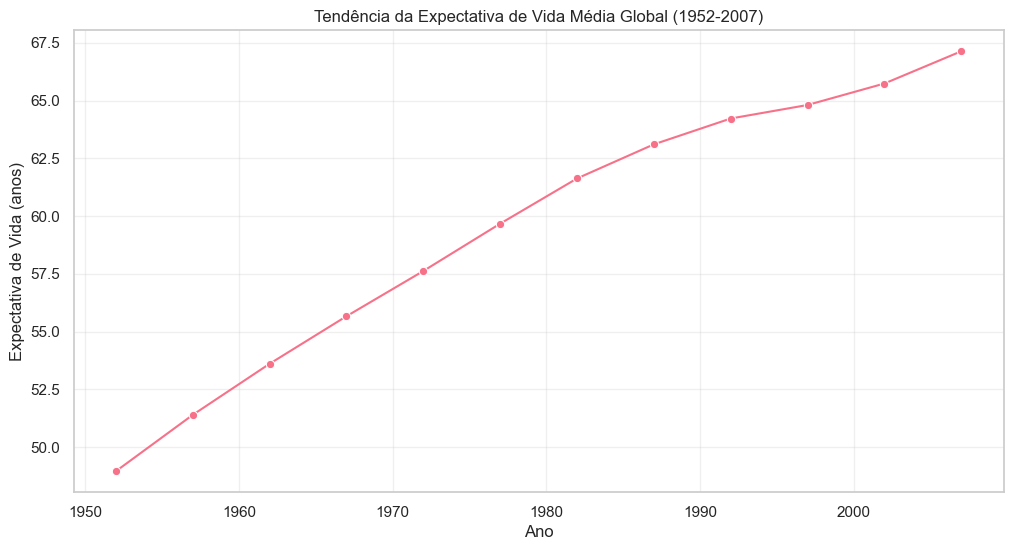


Análise da Expectativa de Vida:
- A expectativa de vida global apresentou crescimento constante entre 1952 e 2007.
- Em 1952, a média global era de aproximadamente 49 anos, subindo para cerca de 67 anos em 2007.
- O crescimento foi mais acentuado entre 1960 e 1980, possivelmente devido a avanços na medicina e melhoria nas condições sanitárias.
- A partir dos anos 1990, nota-se uma desaceleração no ritmo de crescimento.


In [6]:
# 1. Tendência da Expectativa de Vida Média Global ao Longo do Tempo
df_lifeexp_over_time = df.groupby('year')['lifeExp'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_lifeexp_over_time, x='year', y='lifeExp', marker='o')
plt.title('Tendência da Expectativa de Vida Média Global (1952-2007)')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (anos)')
plt.grid(True, alpha=0.3)
plt.show()

# Análise do Gráfico de Expectativa de Vida
print("""
Análise da Expectativa de Vida:
- A expectativa de vida global apresentou crescimento constante entre 1952 e 2007.
- Em 1952, a média global era de aproximadamente 49 anos, subindo para cerca de 67 anos em 2007.
- O crescimento foi mais acentuado entre 1960 e 1980, possivelmente devido a avanços na medicina e melhoria nas condições sanitárias.
- A partir dos anos 1990, nota-se uma desaceleração no ritmo de crescimento.""")

## 8. Análise Detalhada por Continente

Nesta seção, vamos analisar as tendências de expectativa de vida, PIB per capita e população separadamente por continente.

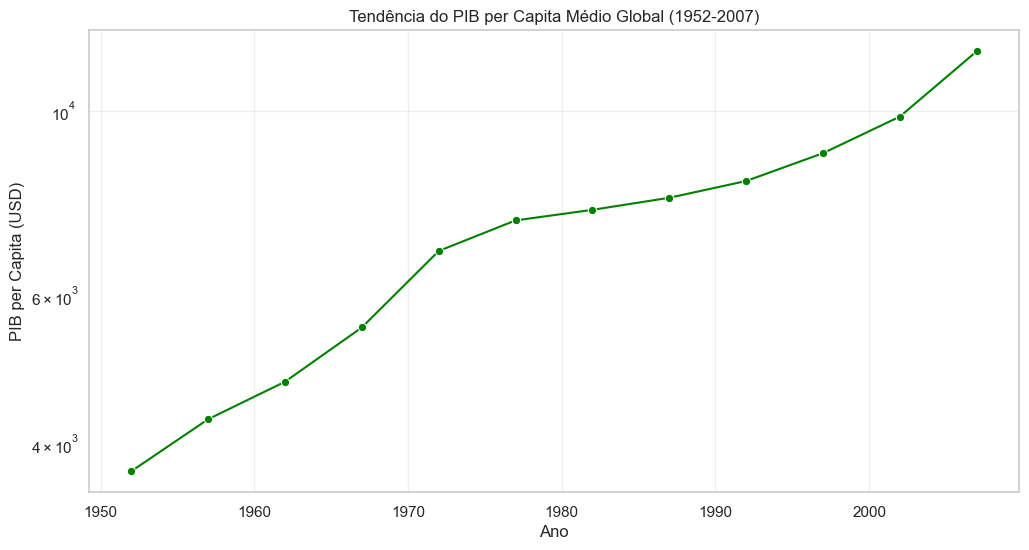


Análise do PIB per Capita:
- O PIB per capita global apresentou crescimento exponencial no período analisado.
- A utilização de escala logarítmica no eixo Y permite visualizar melhor as taxas de crescimento ao longo do tempo.
- Nota-se uma aceleração no crescimento a partir da década de 1980, possivelmente associada à globalização e avanços tecnológicos.
- Apesar do crescimento geral, a distribuição entre países é bastante desigual, como veremos nos próximos gráficos.


In [7]:
# 2. Tendência do PIB per Capita Médio Global ao Longo do Tempo
df_gdp_over_time = df.groupby('year')['gdpPercap'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gdp_over_time, x='year', y='gdpPercap', marker='o', color='green')
plt.title('Tendência do PIB per Capita Médio Global (1952-2007)')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita (USD)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, alpha=0.3)
plt.show()

# Análise do Gráfico de PIB per Capita
print("""
Análise do PIB per Capita:
- O PIB per capita global apresentou crescimento exponencial no período analisado.
- A utilização de escala logarítmica no eixo Y permite visualizar melhor as taxas de crescimento ao longo do tempo.
- Nota-se uma aceleração no crescimento a partir da década de 1980, possivelmente associada à globalização e avanços tecnológicos.
- Apesar do crescimento geral, a distribuição entre países é bastante desigual, como veremos nos próximos gráficos.""")

In [8]:
# Gráfico de dispersão animado mostrando a relação entre PIB per capita e expectativa de vida
import plotly.express as px

# Criar o gráfico de dispersão animado
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size="pop",
                 color="continent",
                 hover_name="country",
                 size_max=70,
                 animation_frame="year",
                 range_x=[200, 120000],
                 range_y=[20, 90],
                 log_x=True,
                 title="Relação entre PIB per Capita e Expectativa de Vida (1952-2007)",
                 labels={
                     "gdpPercap": "PIB per Capita (USD, escala logarítmica)",
                     "lifeExp": "Expectativa de Vida (anos)",
                     "continent": "Continente",
                     "pop": "População",
                     "year": "Ano"
                 })

# Melhorar o layout
fig.update_layout(
    xaxis_title="PIB per Capita (USD, escala logarítmica)",
    yaxis_title="Expectativa de Vida (anos)",
    legend_title="Continente",
    hovermode="closest",
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

# Adicionar uma linha de tendência
# Para o ano mais recente (2007)
df_2007 = df[df['year'] == 2007]
fig.add_scatter(x=df_2007['gdpPercap'], 
                y=df_2007['lifeExp'],
                mode='markers',
                marker=dict(size=0, opacity=0),  # Pontos invisíveis
                showlegend=False,
                hoverinfo='skip',
                name='')

# Exibir o gráfico
fig.show()

# Exibir a análise formatada
from IPython.display import display, Markdown

analise = """
## Análise da Relação entre Riqueza e Longevidade ao Longo do Tempo

O gráfico de dispersão animado acima apresenta uma visão dinâmica da relação entre o PIB per capita (riqueza econômica) e a expectativa de vida (longevidade) dos países entre 1952 e 2007. Esta visualização permite identificar padrões importantes:

### Principais Observações:

1. **Relação Positiva**: Observa-se uma clara correlação positiva entre riqueza e longevidade - países com maior PIB per capita tendem a apresentar maior expectativa de vida.

2. **Progressão Temporal**: A animação revela como essa relação evoluiu ao longo de mais de cinco décadas, mostrando melhorias globais em ambos os indicadores.

3. **Diferenças Regionais**: 
   - **África**: Maior concentração na parte inferior esquerda, indicando menores níveis de renda e expectativa de vida.
   - **Américas e Europa**: Posicionam-se predominantemente na região superior direita, refletindo melhores indicadores socioeconômicos.
   - **Ásia**: Mostra grande variação, com países como Japão e Coreia do Sul apresentando notável progresso.

4. **Efeito de Diminuição de Retornos**: A relação entre renda e longevidade não é linear - aumentos no PIB per capita têm impacto decrescente sobre a expectativa de vida à medida que os países se tornam mais ricos.

5. **Outliers**: Alguns países, como aqueles com recursos naturais abundantes, mostram alta renda per capita sem correspondente alta expectativa de vida, sugerindo que a riqueza sozinha não garante melhores resultados em saúde.

### Implicações:

Esta análise reforça a importância do desenvolvimento econômico para a melhoria da qualidade de vida, mas também destaca que outros fatores, como distribuição de renda, acesso à saúde e educação, desempenham papéis cruciais no bem-estar das populações. A visualização dinâmica permite identificar países que conseguiram melhorar significativamente seus indicadores ao longo do tempo, servindo como exemplos de políticas bem-sucedidas.
"""

display(Markdown(analise))


## Análise da Relação entre Riqueza e Longevidade ao Longo do Tempo

O gráfico de dispersão animado acima apresenta uma visão dinâmica da relação entre o PIB per capita (riqueza econômica) e a expectativa de vida (longevidade) dos países entre 1952 e 2007. Esta visualização permite identificar padrões importantes:

### Principais Observações:

1. **Relação Positiva**: Observa-se uma clara correlação positiva entre riqueza e longevidade - países com maior PIB per capita tendem a apresentar maior expectativa de vida.

2. **Progressão Temporal**: A animação revela como essa relação evoluiu ao longo de mais de cinco décadas, mostrando melhorias globais em ambos os indicadores.

3. **Diferenças Regionais**: 
   - **África**: Maior concentração na parte inferior esquerda, indicando menores níveis de renda e expectativa de vida.
   - **Américas e Europa**: Posicionam-se predominantemente na região superior direita, refletindo melhores indicadores socioeconômicos.
   - **Ásia**: Mostra grande variação, com países como Japão e Coreia do Sul apresentando notável progresso.

4. **Efeito de Diminuição de Retornos**: A relação entre renda e longevidade não é linear - aumentos no PIB per capita têm impacto decrescente sobre a expectativa de vida à medida que os países se tornam mais ricos.

5. **Outliers**: Alguns países, como aqueles com recursos naturais abundantes, mostram alta renda per capita sem correspondente alta expectativa de vida, sugerindo que a riqueza sozinha não garante melhores resultados em saúde.

### Implicações:

Esta análise reforça a importância do desenvolvimento econômico para a melhoria da qualidade de vida, mas também destaca que outros fatores, como distribuição de renda, acesso à saúde e educação, desempenham papéis cruciais no bem-estar das populações. A visualização dinâmica permite identificar países que conseguiram melhorar significativamente seus indicadores ao longo do tempo, servindo como exemplos de políticas bem-sucedidas.


## 9. Conclusão

Com base nas análises realizadas, podemos destacar as seguintes descobertas:

### Principais Descobertas
1. **Relação entre Riqueza e Saúde**:
   - Correlação positiva entre PIB per capita e expectativa de vida, especialmente em países em desenvolvimento.
   - A partir de US$ 10.000 de PIB per capita, os ganhos em expectativa de vida tornam-se menos significativos.

2. **Desigualdades Regionais**:
   - África apresenta os menores índices de desenvolvimento humano.
   - Europa e Oceania concentram os melhores indicadores socioeconômicos.
   - Ásia mostra a maior variação entre países ricos e pobres.

3. **Evolução Temporal**:
   - Melhora consistente na expectativa de vida em todos os continentes.
   - Disparidade econômica entre países diminuiu ligeiramente, mas ainda é significativa.
   - Crescimento populacional mais acelerado na África e Ásia.

4. **Fatores de Influência**:
   - PIB per capita é um forte preditor da expectativa de vida.
   - Outros fatores como saúde, educação e saneamento básico também são cruciais.

### Recomendações
1. **Países em desenvolvimento**: Priorizar investimentos em educação e saúde básica.
2. **Organizações internacionais**: Focar na redução das desigualdades, com atenção especial à África Subsaariana.
3. **Pesquisadores**: Investigar casos de sucesso em países em desenvolvimento.

### Limitações
1. Dados disponíveis apenas até 2007.
2. Médias nacionais podem ocultar desigualdades internas.
3. Fatores qualitativos não foram considerados.

### Próximos Passos
1. Atualizar análise com dados mais recentes.
2. Incluir variáveis adicionais como desigualdade de renda.
3. Desenvolver modelos preditivos para tendências futuras.
4. Realizar análises regionais mais detalhadas.